In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('D:/pandas Practice/cars.csv')
print(cars.isna().sum())
print(cars.shape)
cars.head(3)

Volume    3
Weight    0
CO2       3
dtype: int64
(36, 3)


,Volume,Weight,CO2
0,1000.0,790,99.0
1,1200.0,1160,95.0
2,1000.0,929,95.0


In [3]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('first',KNNImputer(n_neighbors=3)),('second',StandardScaler())])
tx = pipe.fit_transform(cars) #The transformed output of pipeline will be an ndarray.
df = pd.DataFrame(tx,index=cars.index,columns=cars.columns) #Convert the ndarray to dataframe.
df.head(5)

,Volume,Weight,CO2
0,-1.605909,-2.103893,-0.486700
1,-1.079541,-0.554072,-1.044405
2,-1.605909,-1.521663,-1.044405
3,-1.869092,-1.789740,-1.741536
4,-0.289990,-0.637846,0.349856


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_clust = kmeans.fit_predict(df)
y_clust #We get the predicted label as cluster indices from 0 to 2.

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0])

In [5]:
#The predicted labels we've stored as an object(i.e. y_clust) are aslo stored internally by the algorithm.
kmeans.labels_

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0])

In [6]:
#Get the centroids of the 3 formed clusters.
kmeans.cluster_centers_

array([[ 1.34175002,  1.4363994 ,  1.92072393],
       [-1.23745125, -1.23431775, -0.75161008],
       [ 0.26979821,  0.2457705 , -0.09940566]])

In [7]:
new = np.random.randn(2,3)
new #Create 2 new examples.

array([[ 0.2852709 , -0.62093007,  0.18202084],
       [ 2.26155344,  0.11531896,  1.90748865]])

In [8]:
#Feed the new examples to the algorithm to let it predict the cluster indices.
kmeans.predict(new)

array([2, 0])

<h4>Instead of assigning each example to a single cluster(i.e. Hard Clustering), we can give each example a score per cluster(i.e. Soft Clustering)<h4>
<h4>The score can be the distance of each example from cluster centroids or a similarity score like Gaussian RBF.<h4>

In [9]:
#The 'transform' method gives the distance of each example from the centroids of each cluster.
#We have 2 examples. So we get distance of both from the 3 cluster centroids.
kmeans.transform(new)
#The prediction of cluster label for each of the 2 examples in previous cell coincides with the below results.

array([[2.89341341, 1.8885428 , 0.91137816],
       [1.60980342, 4.59732086, 2.83050018]])

<h4>The 'kmeans.transform' technique can be used to transform a high dimensional data to a lower dimension data.<h4>
<h4>Lets say we have a 100 dimension data. If we initiate KMeans with 'n_clusters=50' and then perform 'kmeans.transform', it will give a 50 dimensional data as O/P.<h4>
<h4>Thus kmeans also acts as a dimensionality reduction technique.<h4>

<h4>We can provide our own starting point(centroids)for the KMeans algorithm via 'init' option.<h4>
<h4>The 'n_init' option performs n iterations where it randomly chooses n different starting points. Thus it gets n cluster labels, one for each iteration.<h4>
<h4>It then chooses 1 out of those n sets of answers as the optimum cluster label for the given examples.<h4>

In [10]:
start = np.random.randn(3,3)
start #Created 3 random cluster centroids.

array([[ 1.83266197,  1.02938507, -0.90825684],
       [-0.20877764,  0.53359521, -1.0849886 ],
       [-1.75060829,  0.07494427,  1.94547478]])

In [11]:
kmeans1 = KMeans(n_clusters=3,init=start)
y_new = kmeans1.fit_predict(df)
y_new

C:\Users\win\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [12]:
kmeans1.predict(new)

array([1, 0])

<h5>As discussed, the KMeans algo by default(n_init=10)performs 10 iterations of the process choosing a new random starting point as cluster centroid.<h5>
<h5>Hence on running the 'fit()' method, the algorithm runs 10 iterations each converging to 10 solutions for cluster labels for our examples.<h5>
<h5>The algorithm then chooses the optimal solution as the one which minimizes the Inertia of our model. A performance metric checked by algo behind the scenes.<h5>
<h5>The model's inertia is equal to the mean of squared distance of each example from its cluster centroid.<h5>
<h5>Hence the KMeans algo performs n_init iterations and keeps the model with the lowest inertia.<h5>

In [13]:
kmeans.score(df) #The KMeans algo did 10 iterations and then came up with the optimal model whose inertia was 31.034. Other 9 iterations had greater inertia.
#The score is negative of inertia. This is because in scikit the model with highest score is the best, meaning as inertia is lower its negative has higher value.

-31.03439020817297

In [14]:
#For large datasets, we can use MiniBatchKMeans algorithm which speeds up the training by 4 times.
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=3)
y_mini = mini_kmeans.fit_predict(df)
y_mini

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2])

In [15]:
print(mini_kmeans.predict(new))
mini_kmeans.score(df)
#The inertia for mini-batch KMeans is slightly worse than KMeans but can be considered for large datasets.

[0 2]


-31.08125920249976

<h5>Inertia however, isn't a good metric for judging a clustering model.<h5>
<h5>This is because as we increase k, the inertia keeps decreasing. Hence we might keep increasing k to get a better model.<h5>
<h5>Silhouette score/plot gives us a good metric to judge a clustering model. We'll discuss it later.<h5>

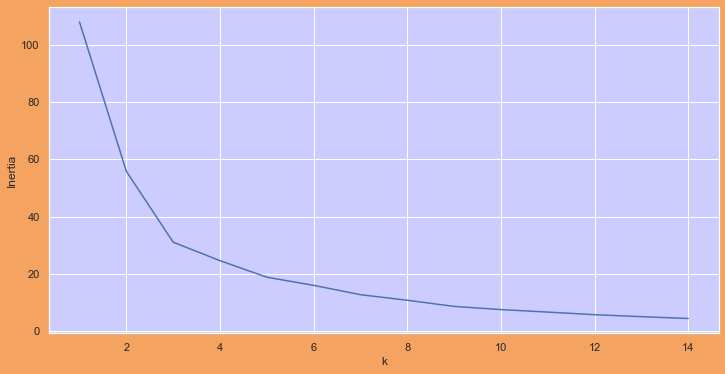

In [18]:
#ELBOW METHOD
#It's used to find the optimal no. of clusters to perform clustering on our dataset.
Inertia = []
for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df)
    Inertia.append(kmeans2.inertia_)
dt = pd.DataFrame({'k':range(1,15),'Inertia':Inertia})
sns.lineplot(data=dt,x='k',y='Inertia')
plt.gcf().set_size_inches(12,6)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#f4a460'})
#We can see the elbow occurs at k=4. Hence we can choose no. of clusters as 4 for our algorithm.

<h5>We can also use Silhouette Score to find the optimal no. of clusters.<h5>
<h5>Every example in the dataset has its own Silhouette coefficient.<h5>

<h5>An example's Silhouette coeff. = (b-a)/max(a,b)<h5>
<h5>Here, a => Mean Intra-cluster distance i.e. mean of distance of that example from other examples of the same cluster.<h5>
<h5>b => Mean nearest cluster distance i.e. mean of distance of that example from other examples of the nearest cluster.<h5>


<h5>Silhouette coefficient's value varies between -1 to +1.<h5>
<h5>A value close to +1 means an example is well inside its own cluster. A value close to 0 means its on the boundary of another cluster.<h5>
<h5>While a coefficient of close to -1 indicates the example has been misgrouped into a wrong cluster.<h5>

<h5>The Silhouette Plot gives the silhouette score for each cluster.
<h5>The Silhouette score of a cluster is the mean of silhouette coefficients of all examples inside that cluster.<h5>


In [17]:
#Silhouette Plot and line chart.